In [1]:
import os 
import sys
# set pythonpath 
sys.path.append('/data/fanyunqian/sch/distkv/lightllm')

import matplotlib.pyplot as plt
import json

from lightllm.server.predictor.manager import LoadPredictor

60 60
ERROR 10-04 07:46:21.377 [manager.py:354] error in loading config file: realpath=/data/fanyunqian/sch/distkv/lightllm/evaluation/task11/decode_pred_2instance_test.yaml


FileNotFoundError: [Errno 2] No such file or directory: '/data/fanyunqian/sch/distkv/lightllm/evaluation/task11/decode_pred_2instance_test.yaml'

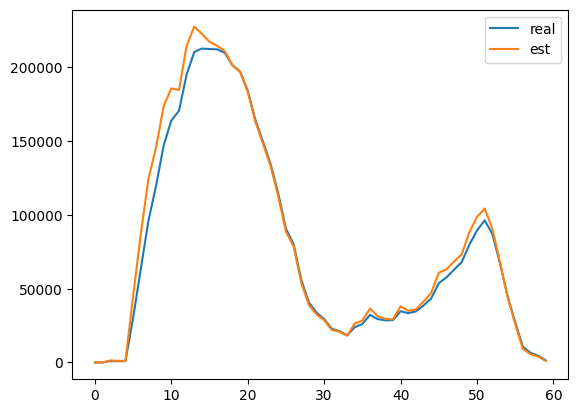

In [2]:
# for i in range(1, 2):
i = 1
decode = f'/data/fanyunqian/sch/distkv/lightllm/evaluation/task11/decode_history.p2d6.0.1.xm_real_data.json'
data = json.load(open(decode))['decode']
data = {int(k) : v for k,v in data.items()}
sorted_keys = sorted(data.keys())
real_load = [sum(data[k]['token_load_list']) for k in sorted_keys]
est_load = [data[k]['details']['est_token'] for k in sorted_keys]
real_req = [sum(data[k]['batch_load_list']) for k in sorted_keys]
print(len(real_load), len(est_load))

plt.figure()
plt.plot(sorted_keys, real_load, label='real')
plt.plot(sorted_keys, est_load, label='est')
plt.legend()

predictor = LoadPredictor('/data/fanyunqian/sch/distkv/lightllm/evaluation/task11/decode_pred_2instance_test.yaml')
for rload, rreq in zip(real_load, real_req):
    predictor.decode_predict([rload], [rreq])
decode = predictor.config.history['decode']
sorted_keys = sorted(decode.keys())
est_load = [decode[k]['details']['est_token'] for k in sorted_keys]
plt.figure()
plt.plot(sorted_keys, real_load, label='real')
plt.plot(sorted_keys, est_load, label='est')
plt.legend()

INFO 10-02 05:56:10.654 [manager.py:358] start predictor with config: {'config_type': 'req2load', 'config': {'pull_threshold': 0.0, 'push_threshold': 0.8, 'min_instance': 1, 'token_per_instance': 32000000, 'total_instance': 2, 'slack_rate': 0.2, 'warmup_time': 1, 'update_time': 2, 'window_time': 5, 'disabled': False, 'load_per_req': 120000, 'alpha': 0.01, 'beta': 10, 'dump_path': '/data/fanyunqian/sch/distkv/lightllm/evaluation/task11/prefill_history.json'}}


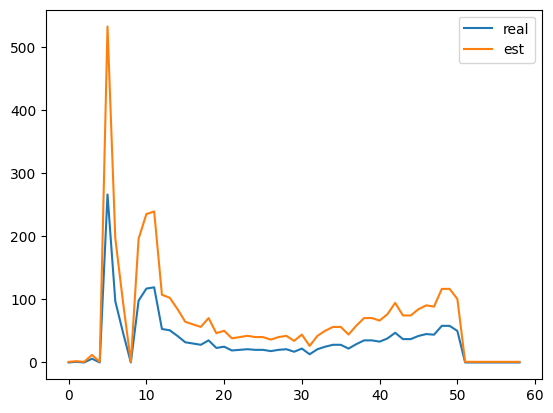

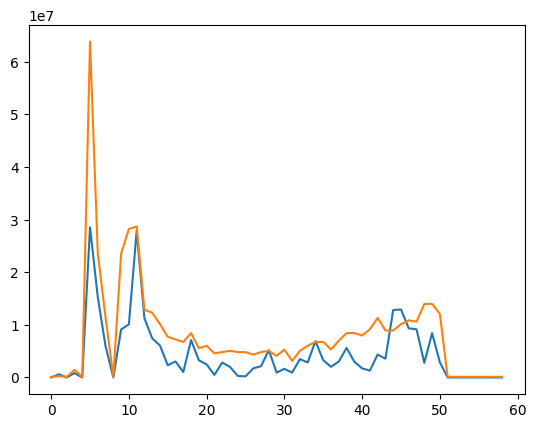

In [15]:
i = 1
decode = f'/data/fanyunqian/sch/distkv/lightllm/evaluation/task11/prefill_history.p2d6.0.1.xm_real_data.json'
data = json.load(open(decode))['prefill']
data = {int(k) : v for k,v in data.items()}
sorted_keys = sorted(data.keys())
real_load = [sum(data[k]['token_load_list']) for k in sorted_keys]
real_req = [sum(data[k]['batch_load_list']) for k in sorted_keys]
predictor = LoadPredictor('/data/fanyunqian/sch/distkv/lightllm/evaluation/task11/prefill_pred_2instance_test.yaml')
for rload, rreq in zip(real_load, real_req):
    predictor.prefill_predict([rload], [rreq])
prefill = predictor.config.history['prefill']
sorted_keys = sorted(prefill.keys())
est_load = [prefill[k]['details']['est_req'] for k in sorted_keys]
real_load = [prefill[k]['details']['total_req'] for k in sorted_keys]
plt.figure()
plt.plot(sorted_keys, real_load, label='real')
plt.plot(sorted_keys, est_load, label='est')
# plt.plot(sorted_keys, [2e5 * x for x in est_load], label='est')
plt.legend()

plt.figure()

est_load = [prefill[k]['details']['est_token'] for k in sorted_keys]
real_load = [sum(data[k]['token_load_list']) for k in sorted_keys]
plt.plot(sorted_keys, real_load, label='real')
plt.plot(sorted_keys, est_load, label='est')


662 662


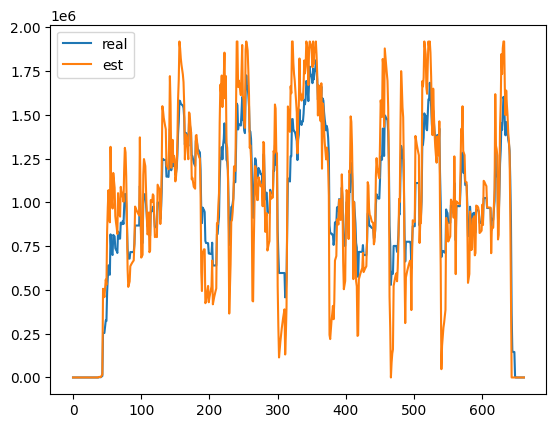

In [17]:
# for i in range(1, 2):
i = 1
decode = f'/data/fanyunqian/sch/distkv/lightllm/evaluation/task11/decode_history.p2d6.0.1.docqa.json'
data = json.load(open(decode))['decode']
data = {int(k) : v for k,v in data.items()}
sorted_keys = sorted(data.keys())
real_load = [sum(data[k]['token_load_list']) for k in sorted_keys]
est_load = [data[k]['details']['est_token'] for k in sorted_keys]
real_req = [sum(data[k]['batch_load_list']) for k in sorted_keys]
print(len(real_load), len(est_load))

plt.figure()
plt.plot(sorted_keys, real_load, label='real')
plt.plot(sorted_keys, est_load, label='est')
plt.legend()


INFO 10-02 06:14:45.093 [manager.py:358] start predictor with config: {'config_type': 'req2load', 'config': {'pull_threshold': 0.0, 'push_threshold': 0.8, 'min_instance': 1, 'token_per_instance': 3200000000, 'total_instance': 2, 'slack_rate': 0.2, 'warmup_time': 1, 'update_time': 2, 'window_time': 5, 'disabled': False, 'load_per_req': 5000000000, 'alpha': 0.01, 'beta': 10, 'dump_path': '/data/fanyunqian/sch/distkv/lightllm/evaluation/task11/prefill_history.json'}}


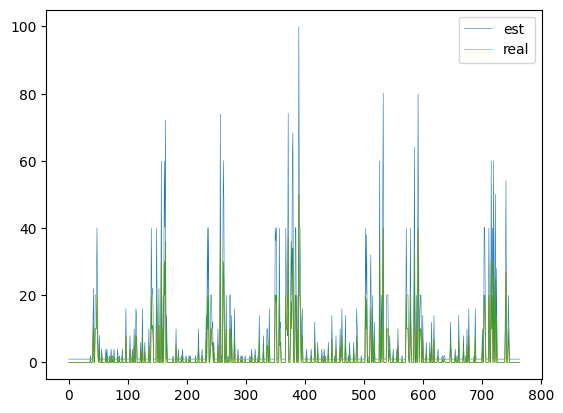

In [30]:
i = 1
decode = f'/data/fanyunqian/sch/distkv/lightllm/evaluation/task11/prefill_history.p2d6.0.1.docqa.json'
data = json.load(open(decode))['prefill']
data = {int(k) : v for k,v in data.items()}
sorted_keys = sorted(data.keys())
real_load = [sum(data[k]['token_load_list']) for k in sorted_keys]
real_req = [sum(data[k]['batch_load_list']) for k in sorted_keys]
predictor = LoadPredictor('/data/fanyunqian/sch/distkv/lightllm/evaluation/task11/prefill_pred_2instance_test.yaml')
for rload, rreq in zip(real_load, real_req):
    predictor.prefill_predict([rload], [rreq])
prefill = predictor.config.history['prefill']
sorted_keys = sorted(prefill.keys())
est_load = [prefill[k]['details']['est_req'] for k in sorted_keys]
real_load = [prefill[k]['details']['total_req'] for k in sorted_keys]
plt.figure()
plt.plot(sorted_keys, est_load, label='est', linewidth=0.4)
plt.plot(sorted_keys, real_load, label='real', linewidth=0.4)
plt.legend()

plt.plot(sorted_keys, real_load, label='real', linewidth=0.5)



43 43
INFO 10-02 06:16:37.343 [manager.py:358] start predictor with config: {'config_type': 'momentum', 'config': {'pull_threshold': 0.0, 'push_threshold': 0.8, 'min_instance': 1, 'token_per_instance': 320000, 'total_instance': 2, 'slack_rate': 0.2, 'warmup_time': 1, 'update_time': 2, 'window_time': 10, 'disabled': False, 'alpha': 0.5, 'beta': 10, 'dump_path': '/data/fanyunqian/sch/distkv/lightllm/evaluation/task11/decode_history_test.json'}}


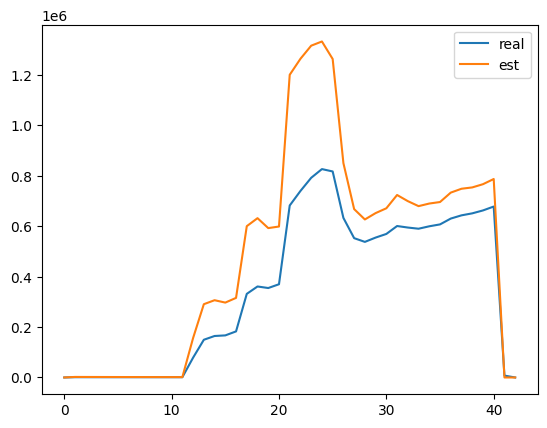

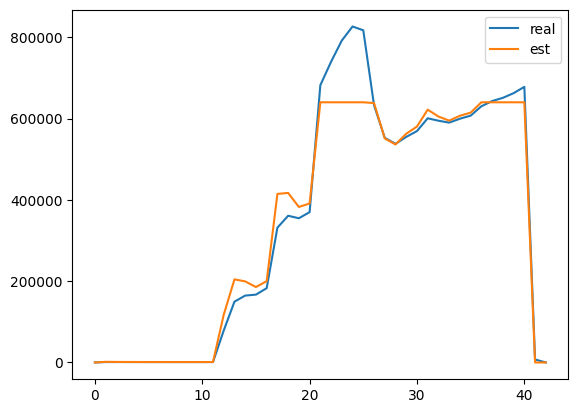

In [32]:
# for i in range(1, 2):
i = 1
decode = f'/data/fanyunqian/sch/distkv/lightllm/evaluation/task11/decode_history.p2d6.0.1.schat.json'
data = json.load(open(decode))['decode']
data = {int(k) : v for k,v in data.items()}
sorted_keys = sorted(data.keys())
real_load = [sum(data[k]['token_load_list']) for k in sorted_keys]
est_load = [data[k]['details']['est_token'] for k in sorted_keys]
real_req = [sum(data[k]['batch_load_list']) for k in sorted_keys]
print(len(real_load), len(est_load))

plt.figure()
plt.plot(sorted_keys, real_load, label='real')
plt.plot(sorted_keys, est_load, label='est')
plt.legend()



predictor = LoadPredictor('/data/fanyunqian/sch/distkv/lightllm/evaluation/task11/decode_pred_2instance_test.yaml')
for rload, rreq in zip(real_load, real_req):
    predictor.decode_predict([rload], [rreq])
decode = predictor.config.history['decode']
sorted_keys = sorted(decode.keys())
est_load = [decode[k]['details']['est_token'] for k in sorted_keys]
plt.figure()
plt.plot(sorted_keys, real_load, label='real')
plt.plot(sorted_keys, est_load, label='est')
plt.legend()


INFO 10-02 06:21:59.764 [manager.py:358] start predictor with config: {'config_type': 'req2load', 'config': {'pull_threshold': 0.0, 'push_threshold': 0.8, 'min_instance': 1, 'token_per_instance': 3200000000, 'total_instance': 2, 'slack_rate': 0.2, 'warmup_time': 1, 'update_time': 2, 'window_time': 5, 'disabled': False, 'load_per_req': 300000, 'alpha': 0.01, 'beta': 10, 'dump_path': '/data/fanyunqian/sch/distkv/lightllm/evaluation/task11/prefill_history.json'}}


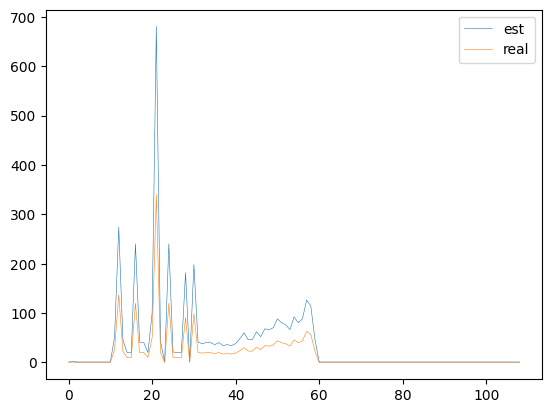

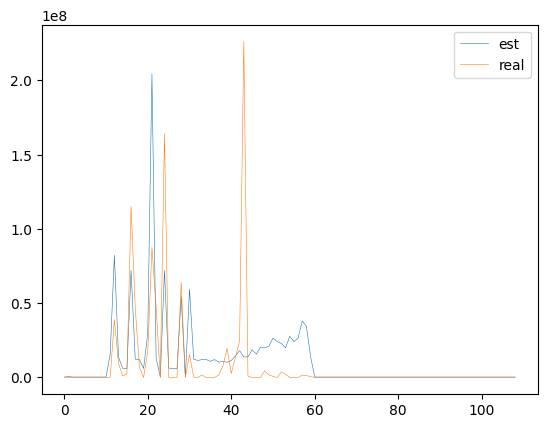

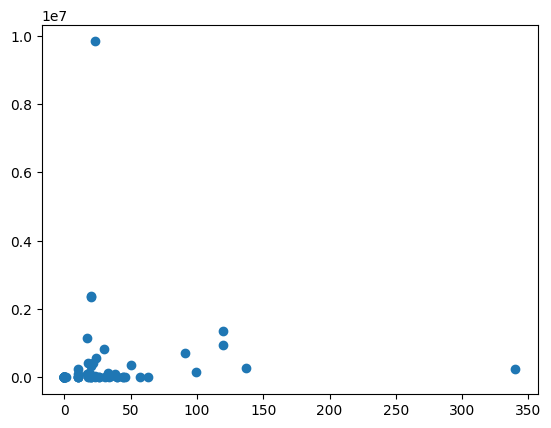

In [38]:
i = 1
decode = f'/data/fanyunqian/sch/distkv/lightllm/evaluation/task11/prefill_history.p2d6.0.1.schat.json'
data = json.load(open(decode))['prefill']
data = {int(k) : v for k,v in data.items()}
sorted_keys = sorted(data.keys())
real_load = [sum(data[k]['token_load_list']) for k in sorted_keys]
real_req = [sum(data[k]['batch_load_list']) for k in sorted_keys]
predictor = LoadPredictor('/data/fanyunqian/sch/distkv/lightllm/evaluation/task11/prefill_pred_2instance_test.yaml')
for rload, rreq in zip(real_load, real_req):
    predictor.prefill_predict([rload], [rreq])
prefill = predictor.config.history['prefill']
sorted_keys = sorted(prefill.keys())
est_load = [prefill[k]['details']['est_req'] for k in sorted_keys]
real_load = [prefill[k]['details']['total_req'] for k in sorted_keys]
plt.figure()
plt.plot(sorted_keys, est_load, label='est', linewidth=0.4)
plt.plot(sorted_keys, real_load, label='real', linewidth=0.4)
plt.legend()


est_load = [prefill[k]['details']['est_token'] for k in sorted_keys]
real_load = [sum(data[k]['token_load_list']) for k in sorted_keys]

plt.figure()
plt.plot(sorted_keys, est_load, label='est', linewidth=0.4)
plt.plot(sorted_keys, real_load, label='real', linewidth=0.4)
plt.legend()

plt.figure()
# scatter req load_per_req 
load_per_req = [rrload / rreq if rreq > 0 else 0 for rrload, rreq in zip(real_load, real_req)]
plt.scatter(real_req, load_per_req, label='real')